In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sd = StandardScaler()
sd.fit_transform()

In [18]:
# Import required packages
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# a. Loading the image data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [3]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


In [19]:
# b. Defining the model architecture
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')   # 10 output classes
])


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# c. Training the model
history = model.fit(x_train, y_train,
                    epochs=1,
                    validation_data=(x_test, y_test), batch_size=128)


391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.6427 - loss: 1.0236 - val_accuracy: 0.6407 - val_loss: 1.0293


In [7]:
# d. Estimating the model's performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5799 - loss: 1.1907
Test Loss: 1.1907049417495728
Test Accuracy: 0.5799000263214111


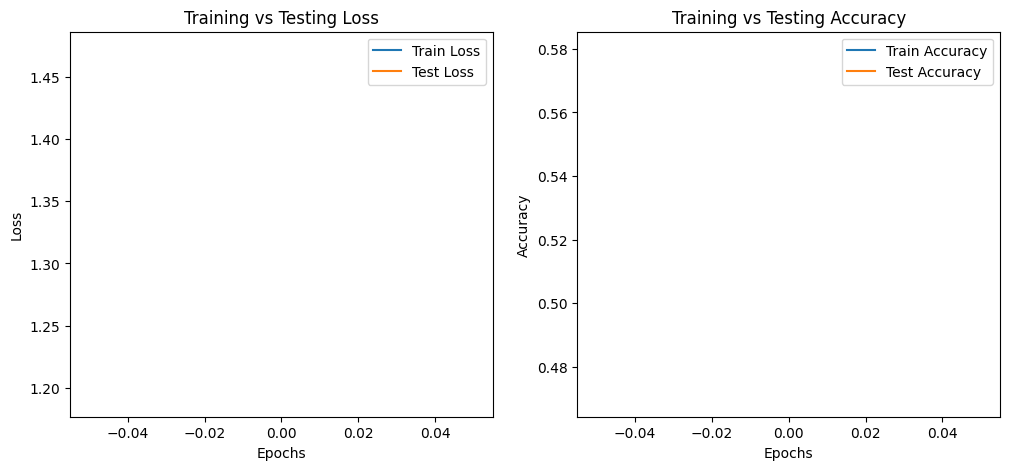

In [9]:
# Plot graphs
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Training vs Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Training vs Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
8
[8]


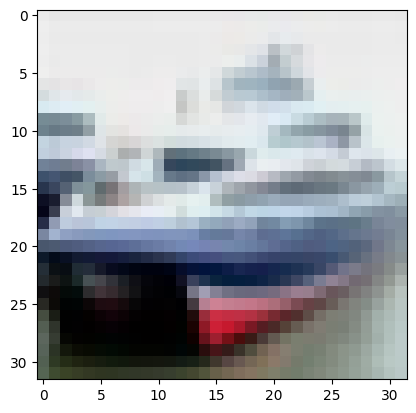

In [14]:
a = model.predict(x_test)
plt.imshow(x_test[1])
print(np.argmax(a[1]))
print(y_test[1])